#Data loading and analyse

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
df=pd.read_csv('vgsales.csv')

In [111]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [113]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Data cleaning and visualization

In [114]:
#To found the missing values
df.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [115]:
df['Publisher'].nunique()

578

In [116]:
df['Year'].nunique()

39

In [117]:
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [118]:
df['Year'].isnull().sum()

271

In [119]:
df['Publisher'].isnull().sum()

58

In [120]:
df['Publisher']=df['Publisher'].fillna('missing')

In [121]:
df['Year']=df['Year'].fillna('2000')

In [122]:
df['Publisher'].nunique()

579

In [123]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

(array([1.6516e+04, 5.9000e+01, 1.3000e+01, 7.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e-02, 8.2830e+00, 1.6556e+01, 2.4829e+01, 3.3102e+01,
        4.1375e+01, 4.9648e+01, 5.7921e+01, 6.6194e+01, 7.4467e+01,
        8.2740e+01]),
 <a list of 10 Patch objects>)

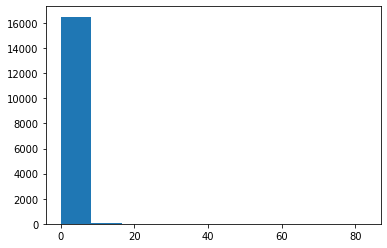

In [124]:
plt.hist('Global_Sales',data=df)

In [125]:
print('skew is:', df['Global_Sales'].skew())

skew is: 17.400645097552452


In [126]:
df['Global_Sales']=np.log(df['Global_Sales'])
print('skew is:', df['Global_Sales'].skew())

skew is: 0.18101048375166548


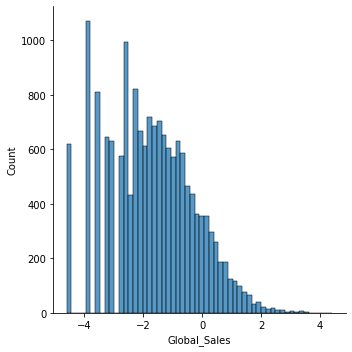

In [127]:
sns.displot(df.Global_Sales)

In [128]:
num_feature=df.select_dtypes(include=[np.number])

In [129]:
num_feature

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,41.49,29.02,3.77,8.46,4.415703
1,2,29.08,3.58,6.81,0.77,3.694862
2,3,15.85,12.88,3.79,3.31,3.578506
3,4,15.75,11.01,3.28,2.96,3.496508
4,5,11.27,8.89,10.22,1.00,3.445852
...,...,...,...,...,...,...
16593,16596,0.01,0.00,0.00,0.00,-4.605170
16594,16597,0.01,0.00,0.00,0.00,-4.605170
16595,16598,0.00,0.00,0.00,0.00,-4.605170
16596,16599,0.00,0.01,0.00,0.00,-4.605170


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


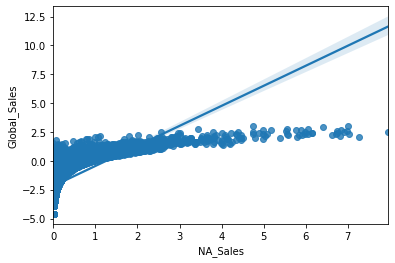

In [130]:
 #removing outliers
 df=df[df['NA_Sales']<8]
 sns.regplot(df.NA_Sales,df.Global_Sales)                                                                                                                                                                                                                                                                                                                        

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


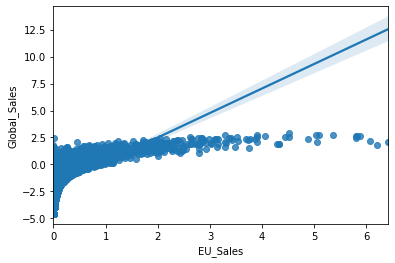

In [131]:
 #removing outliers
 df=df[df['EU_Sales']<8]
sns.regplot(df.EU_Sales,df.Global_Sales)                                                                                                                                                                                                                                                           

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


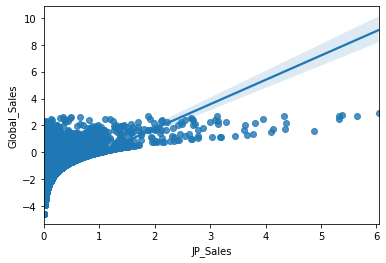

In [132]:
 #removing outliers
 df=df[df['JP_Sales']<8]
sns.regplot(df.JP_Sales,df.Global_Sales)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


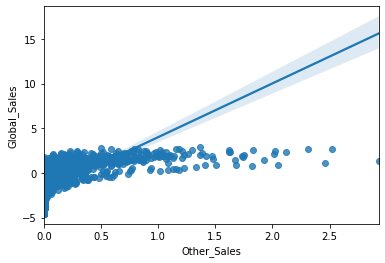

In [133]:
 #removing outliers
 df=df[df['Other_Sales']<4]
sns.regplot(df.Other_Sales,df.Global_Sales)

In [134]:
corr=df.corr()
corr                                               

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.551435,-0.479131,-0.280914,-0.447386,-0.985693
NA_Sales,-0.551435,1.000000,0.718395,0.308880,0.626972,0.635296
EU_Sales,-0.479131,0.718395,1.000000,0.303135,0.769785,0.564792
JP_Sales,-0.280914,0.308880,0.303135,1.000000,0.213673,0.332199
Other_Sales,-0.447386,0.626972,0.769785,0.213673,1.000000,0.518629
Global_Sales,-0.985693,0.635296,0.564792,0.332199,0.518629,1.000000


In [135]:
print(corr['Global_Sales'].sort_values(ascending=False)[:])                                                                    

Global_Sales    1.000000
NA_Sales        0.635296
EU_Sales        0.564792
Other_Sales     0.518629
JP_Sales        0.332199
Rank           -0.985693
Name: Global_Sales, dtype: float64


In [136]:
categorical_feature=df.select_dtypes(exclude=[np.number])                                                                    

In [137]:
categorical_feature

,Name,Platform,Year,Genre,Publisher
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo
26,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo
27,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment
...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision
16596,Know How 2,DS,2010,Puzzle,7G//AMES


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the onl

Action          3312
Sports          2342
Misc            1736
Role-Playing    1486
Shooter         1305
Adventure       1286
Racing          1246
Platform         880
Simulation       866
Fighting         848
Strategy         681
Puzzle           581
Name: Genre, dtype: int64

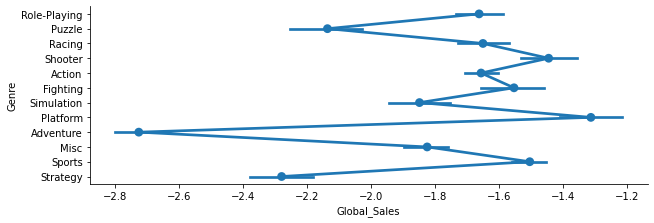

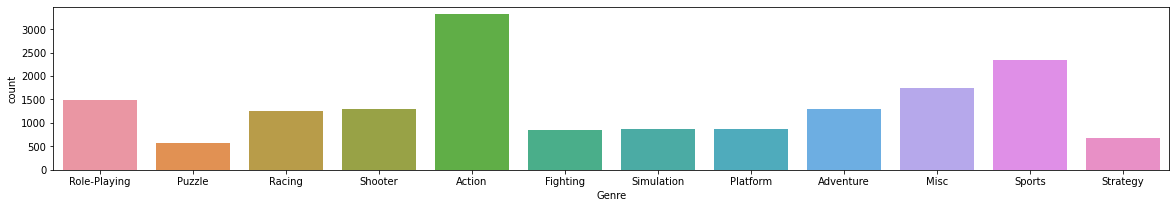

In [138]:
sns.factorplot('Global_Sales','Genre',data=df,size=3,aspect=3)
fig,(axis1) =plt.subplots(1,1,figsize=(20,3))
sns.countplot('Genre', data=df)
df['Genre'].value_counts()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the onl

DS      2159
PS2     2158
PS3     1328
Wii     1318
X360    1259
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     238
XOne     213
SAT      173
WiiU     143
2600     133
NES       95
GB        94
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

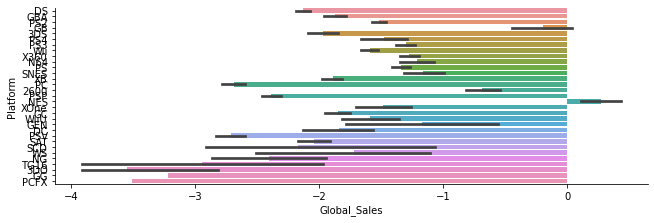

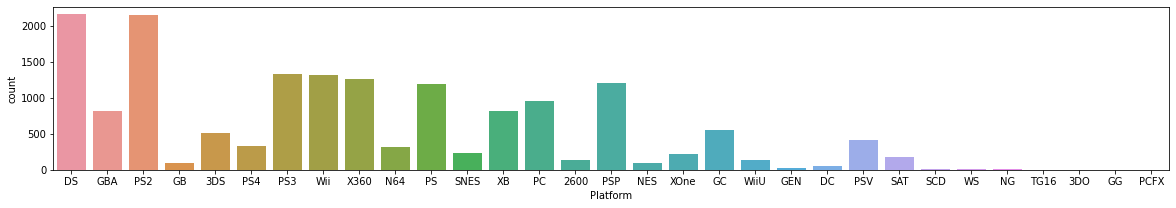

In [139]:
sns.factorplot('Global_Sales','Platform',data=df,size=3,aspect=3,kind='bar')
fig,(axis1) =plt.subplots(1,1,figsize=(20,3))
sns.countplot('Platform', data=df)
df['Platform'].value_counts()                                                                                  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


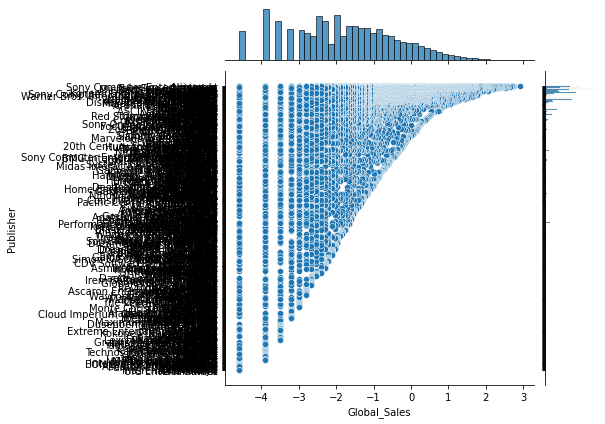

In [140]:
sns.jointplot(df.Global_Sales,df.Publisher,data=df)

In [141]:
df['Name'].nunique()

11476

In [142]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,2.910174
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,2.763170
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,2.729159
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,2.727853
28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,2.706716


In [143]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [144]:
#encoding
df['Publisher']=pd.get_dummies(df['Publisher'],drop_first=True)
df['Genre']=pd.get_dummies(df['Genre'],drop_first=True)
df['Platform']=pd.get_dummies(df['Platform'],drop_first=True)

In [145]:
df.head(50)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
20,21,Pokemon Diamond/Pokemon Pearl,0,2006,0,0,6.42,4.52,6.04,1.37,2.910174
25,26,Pokemon Ruby/Pokemon Sapphire,0,2002,0,0,6.06,3.90,5.38,0.50,2.763170
26,27,Pokemon Black/Pokemon White,0,2010,0,0,5.57,3.28,5.65,0.82,2.729159
27,28,Brain Age 2: More Training in Minutes a Day,0,2005,0,0,3.44,5.36,5.32,1.18,2.727853
28,29,Gran Turismo 3: A-Spec,0,2001,0,0,6.85,5.09,1.87,1.16,2.706716
30,31,Pokémon Yellow: Special Pikachu Edition,0,1998,0,0,5.89,5.04,3.12,0.59,2.683758
32,33,Pokemon X/Pokemon Y,0,2013,0,0,5.17,4.05,4.34,0.79,2.663750
33,34,Call of Duty: Black Ops 3,0,2015,0,0,5.77,5.81,0.35,2.31,2.656055
34,35,Call of Duty: Black Ops II,0,2012,0,0,4.99,5.88,0.65,2.52,2.641198
37,38,Call of Duty: Modern Warfare 3,0,2011,0,0,5.54,5.82,0.49,1.62,2.599722


In [146]:
feature_scale=[feature for feature in df.columns if feature not in ['Rank', 'Name','Global_Sales']]

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(df[feature_scale])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [147]:
ss.transform(df[feature_scale])

array([[-1.34571099e-02, -5.28097590e-02, -2.90078925e-01, ...,
         1.22002975e+01,  2.25261420e+01,  1.06318342e+01],
       [-1.34571099e-02, -7.38953571e-01, -2.90078925e-01, ...,
         1.04752444e+01,  2.00346577e+01,  3.65669671e+00],
       [-1.34571099e-02,  6.33334053e-01, -2.90078925e-01, ...,
         8.75019134e+00,  2.10539013e+01,  6.22226451e+00],
       ...,
       [-1.34571099e-02,  2.90262147e-01, -2.90078925e-01, ...,
        -3.75895994e-01, -2.74715023e-01, -3.52002979e-01],
       [-1.34571099e-02,  6.33334053e-01, -2.90078925e-01, ...,
        -3.48072557e-01, -2.74715023e-01, -3.52002979e-01],
       [-1.34571099e-02, -5.67417618e-01, -2.90078925e-01, ...,
        -3.75895994e-01, -2.74715023e-01, -3.52002979e-01]])

In [148]:
# transform train and test split xo add an another variables
data = pd.concat([df[['Rank', 'Name','Global_Sales']].reset_index(drop=True),
                    pd.DataFrame(ss.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [149]:
data.columns

Index(['Rank', 'Name', 'Global_Sales', 'Platform', 'Year', 'Genre',
       'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [150]:
X=data[['Platform', 'Genre','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [151]:
y=data['Global_Sales']

In [152]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

from sklearn.linear_model import Ridge
rd=Ridge(alpha=0.05)
model=rd.fit(X_train,y_train)

print('R2:',model.score(X_test,y_test))

prediction=model.predict(X_test)

print('RMSE:',mean_squared_error(prediction,y_test))

actual=y_test
plt.scatter(prediction,actual)

from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.05)
model1=ls.fit(X_train,y_train)

print('R2:',model1.score(X_test,y_test))

prediction1=model1.predict(X_test)

print('RMSE:',mean_squared_error(prediction,y_test))

actual=y_test
plt.scatter(prediction,actual)

R2: 0.9953391447366764
RMSE: 1.1079087411444088


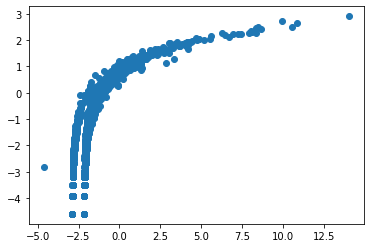

In [159]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model2=rf.fit(X_train,y_train)

print('R2:',model2.score(X_test,y_test))

prediction2=model2.predict(X_test)

print('RMSE:',mean_squared_error(prediction,y_test))

actual=y_test
plt.scatter(prediction,actual)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


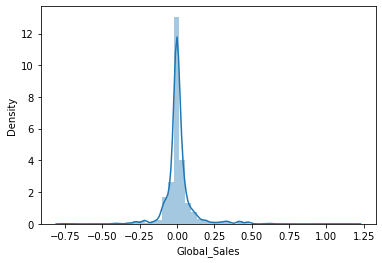

In [160]:
sns.distplot(y_test-prediction2)

In [165]:
#dumb in pickllbe
import pickle 

file=open('video_game_sale_prediction.pkl','wb')

pickle.dump(model2,file)